In [251]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv('data\Breast_cancer.csv')

In [253]:
df

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
1,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
2,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
3,4,ESFSDWWKLLAE,mod. active
4,5,ETFADWWKLLAE,mod. active
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,inactive - virtual
945,946,YLSESVETIKKLGDHITSLKKLW,inactive - virtual
946,947,YPIVDAAMRQLTETG,inactive - virtual
947,948,YQNIVKAVQYAARKLQ,inactive - virtual


In [254]:
df["class"].unique()

array(['mod. active', 'inactive - exp', 'very active',
       'inactive - virtual'], dtype=object)

In [255]:
test_df_abnormal = df[df["class"] == "very active"]

In [256]:
test_df_abnormal

,ID,sequence,class
26,27,FAKKLAKLAKKLAKLAL,very active
27,28,FAKKLAKLAKKLAKLALAL,very active
68,69,FALALKALKKLAKKLKKLAKKAL,very active
85,86,FLGALFKALSKLL,very active
87,88,FLGMIPKLIKKLIKAFK,very active
90,91,FLKLLKKLAAKLF,very active
91,92,FLSLIPKLVKKIIKAFK,very active
92,93,GIGAVLKVLTTGLPALISWIKRKRQQ,very active
99,100,GLFAVIKKVASVIGGL,very active
126,127,KKKFPWWWPFKKKCKKKFPWWWPFKKKC,very active


In [257]:
test_abnormal = test_df_abnormal["sequence"].to_numpy()

In [258]:
test_abnormal.shape

(18,)

In [259]:
train_df = df[df["class"] == "inactive - virtual"]

In [260]:
train_df

,ID,sequence,class
199,200,AADIFSKFKKDMEVKFA,inactive - virtual
200,201,AAQKDNVKSSWAKASA,inactive - virtual
201,202,AASQRKLIAEKFAQALMSSL,inactive - virtual
202,203,AAYATLYEALVLVATLAAP,inactive - virtual
203,204,AEAHESIRLVFHDS,inactive - virtual
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,inactive - virtual
945,946,YLSESVETIKKLGDHITSLKKLW,inactive - virtual
946,947,YPIVDAAMRQLTETG,inactive - virtual
947,948,YQNIVKAVQYAARKLQ,inactive - virtual


In [261]:
train= train_df["sequence"].to_numpy()

In [262]:
train_normal, test_normal = train_test_split(train, test_size = test_abnormal.shape[0]*10, shuffle = True)

In [263]:
train_normal.shape, test_normal.shape

((570,), (180,))

In [314]:
A = set()

for element in train:
    A = A.union(set(element))
for element in test_abnormal:
    A = A.union(set(element))

In [315]:
A

{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

# Applying markov technique

In [423]:
from importlib import reload
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain, compute_probability

In [424]:
A = set()

for element in train:
    A = A.union(set(element))
for element in test_abnormal:
    A = A.union(set(element))

In [425]:
A = np.array(list(A))

In [426]:
A

array(['M', 'A', 'N', 'R', 'E', 'S', 'I', 'P', 'D', 'H', 'L', 'W', 'Q',
       'K', 'Y', 'C', 'T', 'V', 'F', 'G'], dtype='<U1')

In [427]:
Q, P = compute_markov_chain(A, train_normal)

In [428]:
np.sum(Q), np.sum(P, axis = 0)

(1.0000000000000002,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

In [429]:
prob_normal = compute_probability(test_normal, A, Q, P)

In [430]:
prob_abnormal = compute_probability(test_abnormal, A, Q, P)

In [431]:
prob_normal.shape, prob_abnormal.shape

((180,), (18,))

In [432]:
prob_normal = np.sort(prob_normal)
prob_abnormal = np.sort(prob_abnormal)
prob_normal.shape

(180,)

In [433]:
# Computing all the scores:
labels = np.zeros(prob_normal.shape[0]+ prob_abnormal.shape[0])
labels[prob_normal.shape[0]: ] = 1
scores = np.hstack((prob_normal, prob_abnormal))
scores = np.vstack((scores, labels)).T

In [434]:
scores_sorted = scores[scores[:, 0].argsort()]

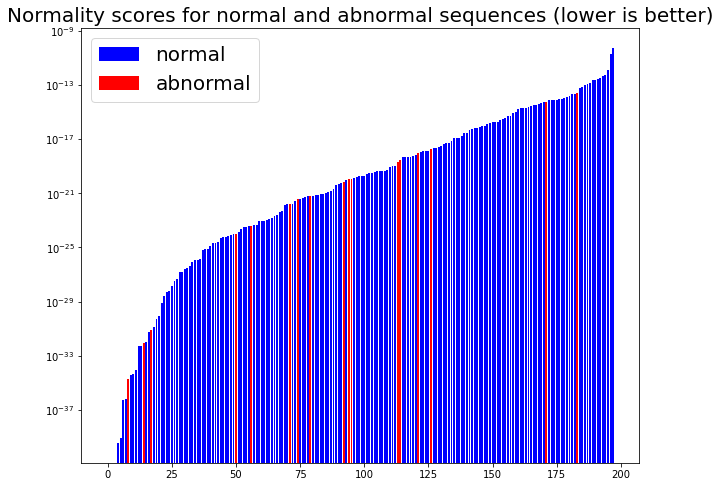

In [435]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [436]:
ab = np.where(scores_sorted[:20] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 4


## Multiple entrie markov chain

In [458]:
from itertools import permutations, combinations_with_replacement

In [459]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain_multi, compute_probability_multi

In [460]:
A = set()

for element in train:
    A = A.union(set(element))
for element in test_abnormal:
    A = A.union(set(element))
A = np.array(list(A))

In [461]:
a = np.copy(A)
a
alphabet = ''

for element in a:
    alphabet += element
    

In [462]:
a.shape

(20,)

In [463]:
len(alphabet)

20

In [464]:
comb = list(combinations_with_replacement(alphabet, 3))
A = []
temp = []
for element in comb:
    temp.append(''.join(element))
for letter in temp:
    for p in permutations(letter):
        A.append(''.join(p))
        
A = np.unique(np.array(A))

In [465]:
A.shape

(8000,)

In [466]:
20**3

8000

In [467]:
Q, P = compute_markov_chain_multi(A, a, train)

In [468]:
np.sum(Q), np.sum(P, axis = 0)

(1.0, array([1., 0., 1., ..., 1., 0., 0.]))

In [469]:
P[np.where(P == 0)] = 1e-5

In [470]:
prob_normal = compute_probability_multi(test_normal, A, a, Q, P)

In [471]:
prob_normal, prob_abnormal

(array([1.22076512e-14, 5.02257648e-08, 8.37096080e-13, 1.96847991e-15,
        2.70446426e-12, 1.11294825e-10, 1.41613999e-08, 2.44153023e-14,
        9.34259018e-11, 3.17723715e-17, 3.06207985e-17, 5.85967256e-11,
        9.10594027e-10, 2.19217080e-15, 4.05669639e-12, 2.61592525e-16,
        5.91026442e-12, 1.55017793e-15, 1.96194394e-15, 1.49481443e-13,
        9.23813171e-26, 1.43058412e-09, 2.09274020e-07, 6.56006023e-16,
        4.39475442e-13, 6.93908593e-14, 4.39475442e-12, 6.86680378e-15,
        9.15573838e-13, 6.51074729e-14, 1.33800074e-19, 1.63070665e-14,
        5.27370531e-11, 2.64346131e-15, 4.25873057e-17, 7.98511981e-13,
        4.39392836e-18, 8.51940843e-22, 1.75790177e-11, 2.17372706e-18,
        2.92983628e-13, 1.80854091e-12, 6.59213163e-11, 1.87810018e-13,
        4.39475442e-14, 9.15573838e-13, 5.49344303e-12, 2.03838331e-09,
        5.85967256e-12, 3.79722204e-20, 1.94637295e-16, 2.14115894e-20,
        2.51128824e-13, 1.80854091e-15, 1.83114768e-13, 2.060041

In [472]:
prob_abnormal

array([1.12938714e-18, 1.75398971e-20, 9.48366922e-24, 1.46880889e-14,
       1.34052232e-25, 1.42742960e-14, 3.72106601e-19, 3.14267454e-38,
       4.22832276e-22, 2.05179994e-97, 6.82198254e-83, 5.87670256e-26,
       6.70630820e-26, 1.80297617e-26, 1.94354238e-37, 1.93793389e-40,
       1.41920909e-17, 3.12225999e-16])

In [473]:
prob_abnormal = compute_probability_multi(test_abnormal, A, a, Q, P)

In [474]:
# Computing all the scores:
labels = np.zeros(prob_normal.shape[0]+ prob_abnormal.shape[0])
labels[prob_normal.shape[0]: ] = 1
scores = np.hstack((prob_normal, prob_abnormal))
scores = np.vstack((scores, labels)).T

In [475]:
scores_sorted = scores[scores[:, 0].argsort()]

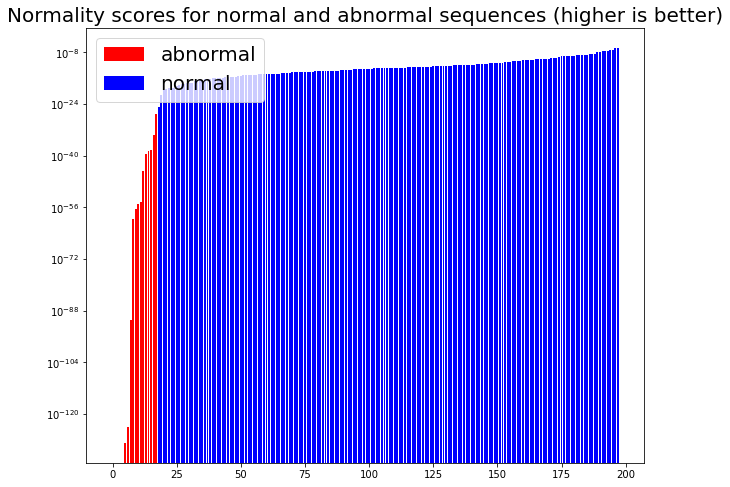

In [476]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (higher is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

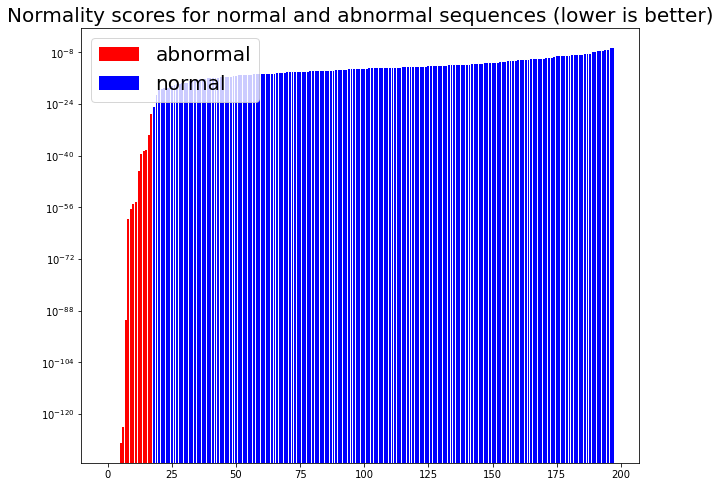

In [422]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (higher is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [417]:
ab = np.where(scores_sorted[:20] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 18


## Multiple entrie markov chain

In [437]:
from itertools import permutations, combinations_with_replacement

In [438]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain_multi, compute_probability_multi

In [439]:
A = set()

for element in train:
    A = A.union(set(element))
for element in test_abnormal:
    A = A.union(set(element))
A = np.array(list(A))

In [440]:
a = np.copy(A)
a
alphabet = ''

for element in a:
    alphabet += element
    

In [441]:
a

array(['M', 'A', 'N', 'R', 'E', 'S', 'I', 'P', 'D', 'H', 'L', 'W', 'Q',
       'K', 'Y', 'C', 'T', 'V', 'F', 'G'], dtype='<U1')

In [442]:
len(alphabet)

20

In [443]:
comb = list(combinations_with_replacement(alphabet, 2))
A = []
temp = []
for element in comb:
    temp.append(''.join(element))
for letter in temp:
    for p in permutations(letter):
        A.append(''.join(p))
        
A = np.unique(np.array(A))

In [444]:
A.shape

(400,)

In [445]:
Q, P = compute_markov_chain_multi(A, a, train)

In [446]:
np.sum(Q), np.sum(P, axis = 0)

(0.9999999999999999,
 array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [447]:
P[np.where(P == 0)] = 1e-5

In [448]:
prob_normal = compute_probability_multi(test_normal, A, a, Q, P)

In [449]:
prob_normal, prob_abnormal

(array([8.74601844e-26, 4.58566441e-15, 4.76785442e-15, 1.54475425e-19,
        7.18933442e-19, 9.37069591e-16, 8.41285138e-12, 1.61413411e-15,
        2.31017767e-22, 5.35343179e-23, 3.15537131e-20, 6.48096772e-14,
        5.99863458e-13, 1.48189812e-29, 7.50412638e-18, 5.93018492e-22,
        6.95464676e-33, 4.17105126e-19, 3.71030864e-20, 2.20177010e-24,
        5.49394613e-33, 1.40152209e-20, 1.39477252e-16, 3.78073368e-24,
        1.03351388e-24, 3.99220508e-12, 7.98375455e-18, 7.63554731e-23,
        4.71254050e-19, 1.51401456e-17, 3.07366905e-25, 2.37009081e-13,
        3.54960904e-16, 4.74736573e-16, 6.85664677e-25, 2.73993145e-20,
        4.51489140e-29, 2.82835027e-33, 3.06312013e-15, 1.34000966e-33,
        1.28670097e-20, 5.23870885e-20, 5.61489823e-22, 3.40116187e-22,
        1.65773140e-19, 2.32167470e-26, 2.87027625e-13, 1.21226275e-19,
        2.27548343e-18, 7.09581936e-33, 6.72198340e-19, 2.92601482e-31,
        9.78046994e-17, 5.53021752e-21, 1.61211227e-18, 5.496240

In [450]:
prob_abnormal

array([0.00000000e+00, 1.86483429e-35, 8.85186939e-33, 7.52616532e-32,
       1.02024648e-24, 3.91455519e-24, 1.53227395e-22, 3.83990575e-22,
       6.24964607e-22, 7.29350844e-21, 1.11995926e-20, 1.16670202e-20,
       2.17056112e-19, 2.77136027e-19, 9.59798674e-19, 2.01703363e-18,
       6.15705339e-15, 2.83827151e-14])

In [451]:
prob_abnormal = compute_probability_multi(test_abnormal, A, a, Q, P)

In [452]:
# Computing all the scores:
labels = np.zeros(prob_normal.shape[0]+ prob_abnormal.shape[0])
labels[prob_normal.shape[0]: ] = 1
scores = np.hstack((prob_normal, prob_abnormal))
scores = np.vstack((scores, labels)).T

In [453]:
scores_sorted = scores[scores[:, 0].argsort()]

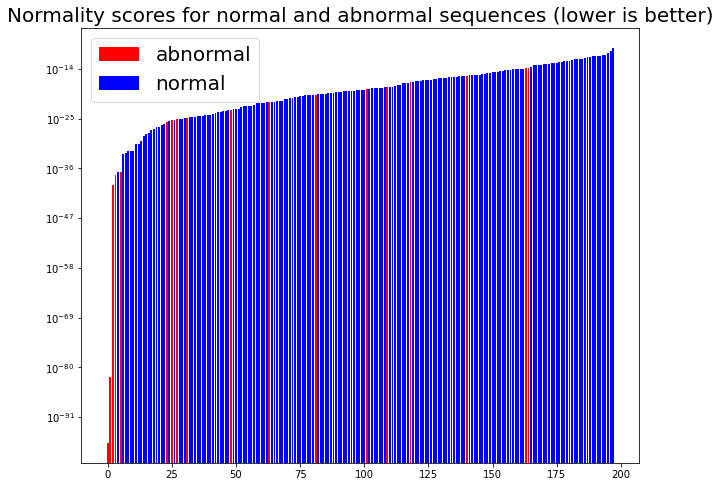

In [454]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.75)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
plt.yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})